
## Clustering with Gaussian Mixture Models (GMM) and Hierarchical Clustering

In this notebook, we demonstrate the use of Gaussian Mixture Models (GMM) and Hierarchical Clustering using different linkage methods.
- **Gaussian Mixture Model (GMM)** is a soft clustering method that assumes data points are generated from a mixture of several Gaussian distributions.
- **Hierarchical Clustering** uses agglomerative clustering to form clusters step-by-step. Various linkage methods are used to define the distance between clusters:
  - **Ward** minimizes the variance within clusters.
  - **Complete (Maximum) Linkage** minimizes the maximum distance between points in pairs of clusters.
  - **Average Linkage** minimizes the average distance between all points in pairs of clusters.
  - **Single Linkage** minimizes the distance between the closest points of pairs of clusters.
  
We will visualize the clustering results and evaluate their performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

### Gaussian Mixture Model (GMM)

In [2]:
# Generate synthetic data for demonstration
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

In [3]:
# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4)
gmm_labels = gmm.fit_predict(X)

Text(0.5, 1.0, 'Gaussian Mixture Model (GMM) Clustering')

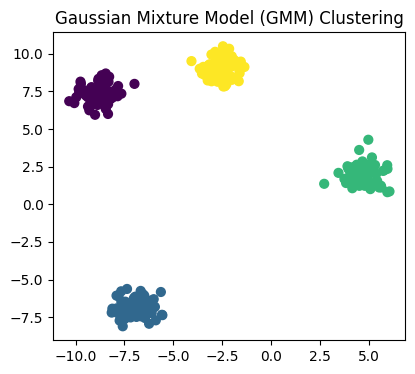

In [4]:
# Plot GMM clustering results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, s=40, cmap='viridis')
plt.title("Gaussian Mixture Model (GMM) Clustering")

### Hierarchical Clustering

In [5]:
# Hierarchical Clustering: Ward's Method
ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
ward_labels = ward.fit_predict(X)

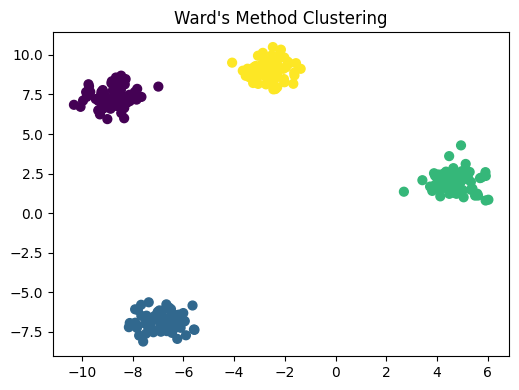

In [6]:
# Plot hierarchical clustering results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=ward_labels, s=40, cmap='viridis')
plt.title("Ward's Method Clustering")
plt.tight_layout()

In [7]:
# Hierarchical Clustering: Complete Linkage
complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
complete_labels = complete.fit_predict(X)

In [8]:
# Hierarchical Clustering: Average Linkage
average = AgglomerativeClustering(n_clusters=4, linkage='average')
average_labels = average.fit_predict(X)

In [9]:
# Hierarchical Clustering: Single Linkage
single = AgglomerativeClustering(n_clusters=4, linkage='single')
single_labels = single.fit_predict(X)

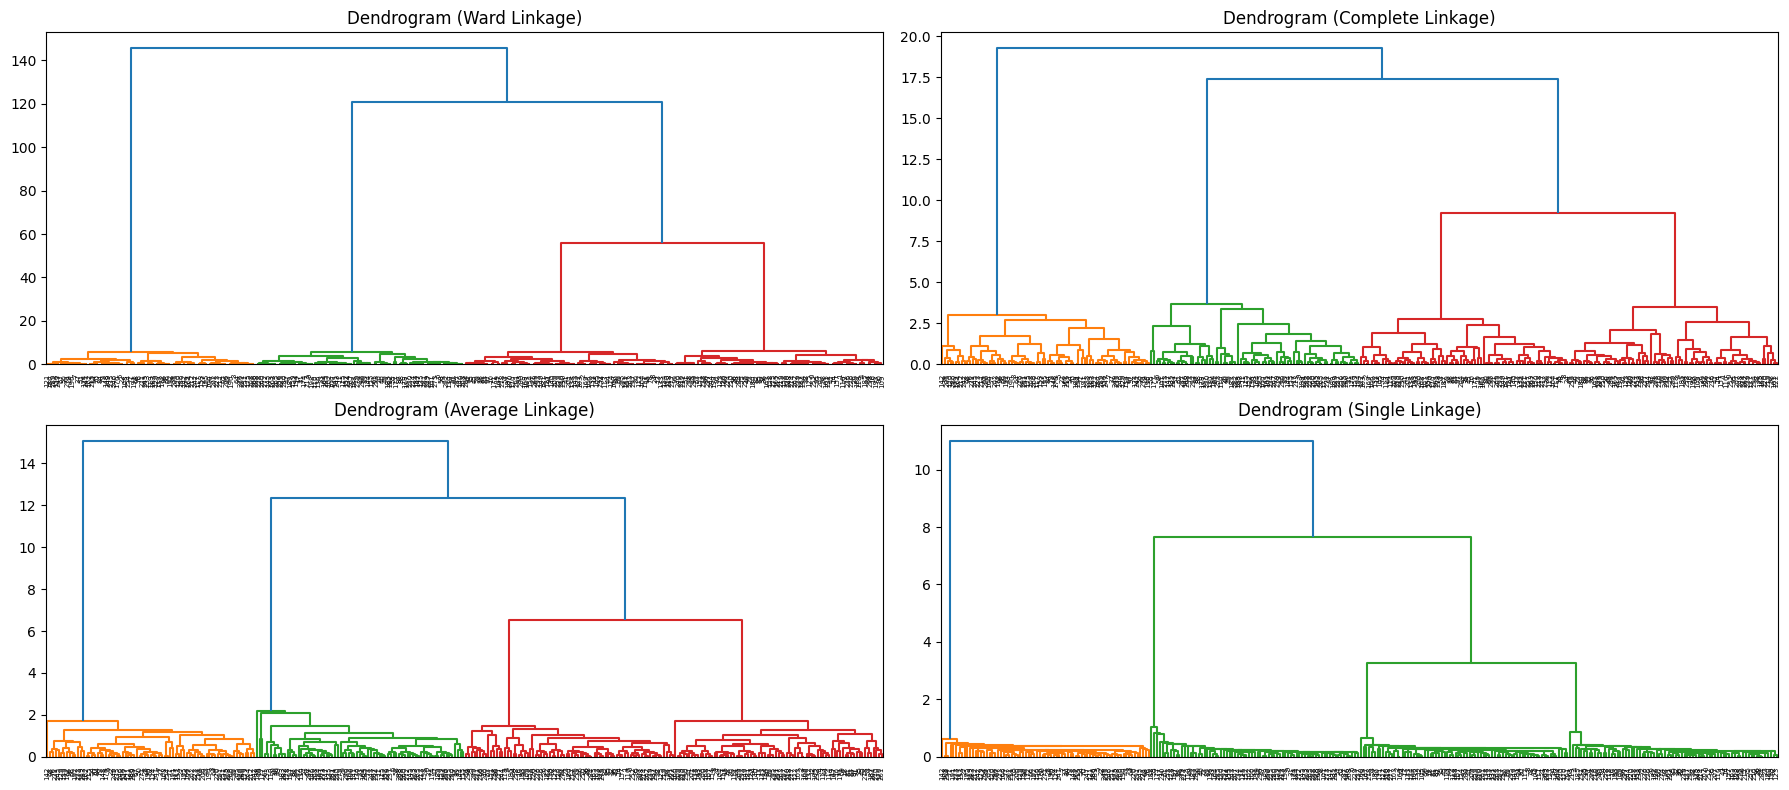

In [10]:
# Plotting dendrograms for hierarchical clustering methods
methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(18, 8))
for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(X, method=method)
    dendrogram(Z)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
plt.tight_layout()


### Clustering Performance Evaluation

To evaluate the performance of each clustering method, we can use the **Silhouette Score**, which measures how similar a point is to its own cluster compared to other clusters.


In [11]:
from sklearn.metrics import silhouette_score


# Silhouette scores for different methods
gmm_silhouette = silhouette_score(X, gmm_labels)
ward_silhouette = silhouette_score(X, ward_labels)
complete_silhouette = silhouette_score(X, complete_labels)
average_silhouette = silhouette_score(X, average_labels)
single_silhouette = silhouette_score(X, single_labels)


# Display silhouette scores for each method
print(f"Silhouette Score for GMM: {gmm_silhouette:.2f}")
print(f"Silhouette Score for Ward: {ward_silhouette:.2f}")
print(f"Silhouette Score for Complete Linkage: {complete_silhouette:.2f}")
print(f"Silhouette Score for Average Linkage: {average_silhouette:.2f}")
print(f"Silhouette Score for Single Linkage: {single_silhouette:.2f}")


Silhouette Score for GMM: 0.88
Silhouette Score for Ward: 0.88
Silhouette Score for Complete Linkage: 0.88
Silhouette Score for Average Linkage: 0.88
Silhouette Score for Single Linkage: 0.88


### Two more example on hierachical clustering using `scipy`

In [12]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])

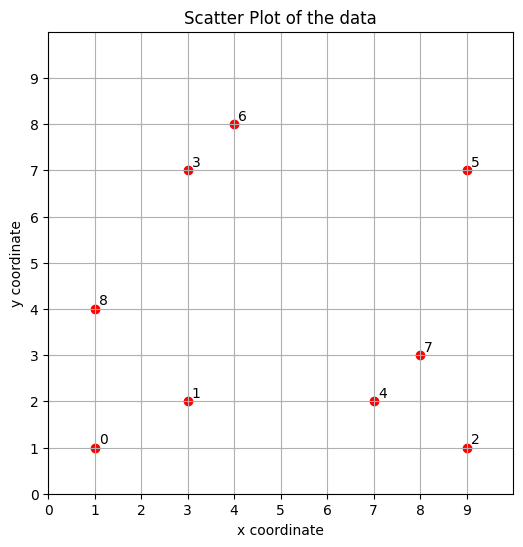

In [13]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')
    
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

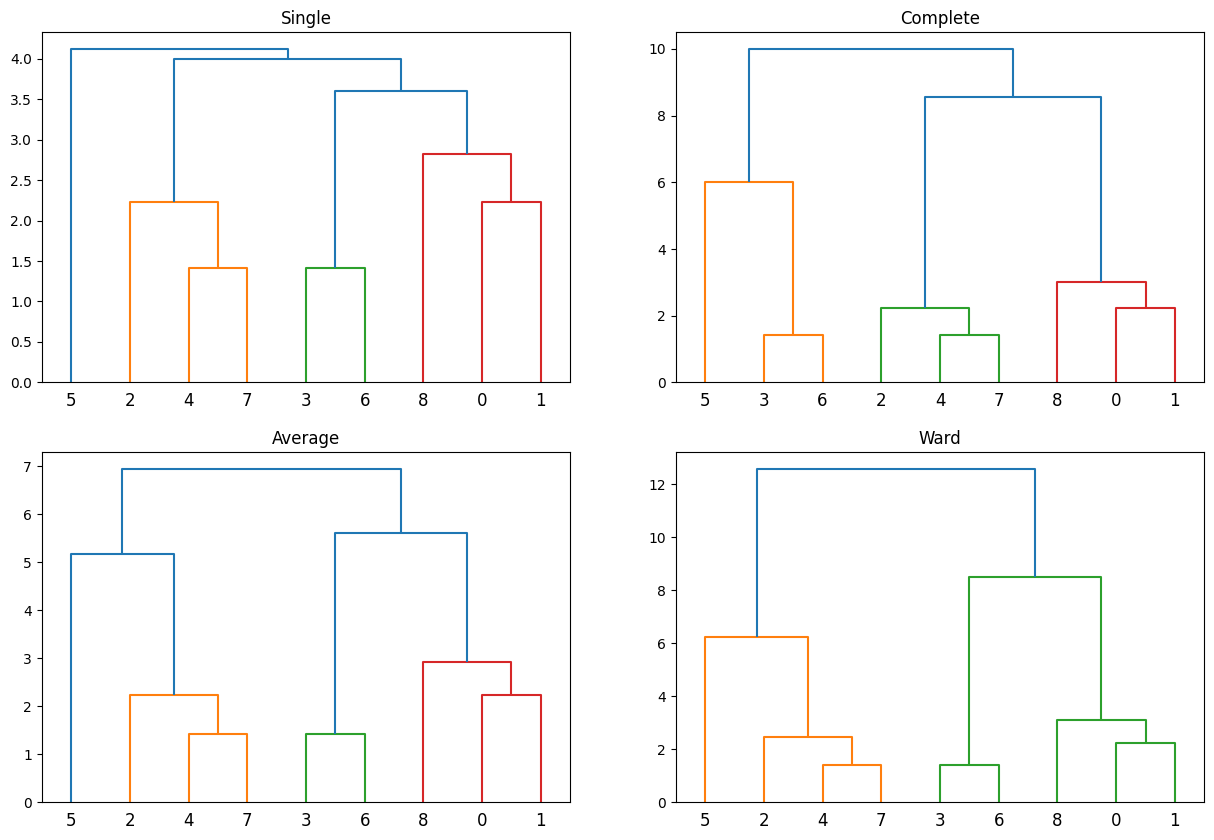

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward');

In [16]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


In [17]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)

[0 0 1 0 1 1 0 1 0]


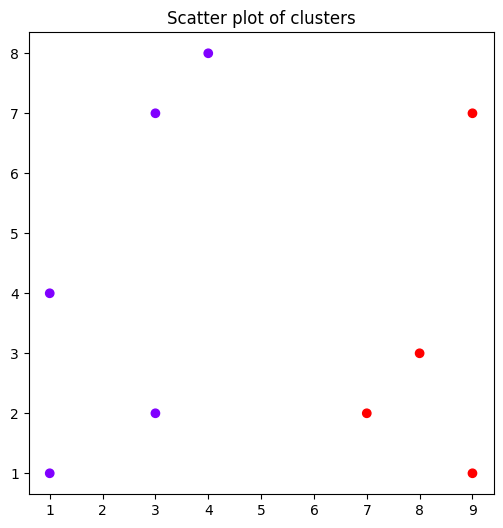

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')
plt.title('Scatter plot of clusters');

In [19]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [20]:
X2 = df.iloc[:,1:10]
Z2 = linkage(X2, method='ward', metric='euclidean')

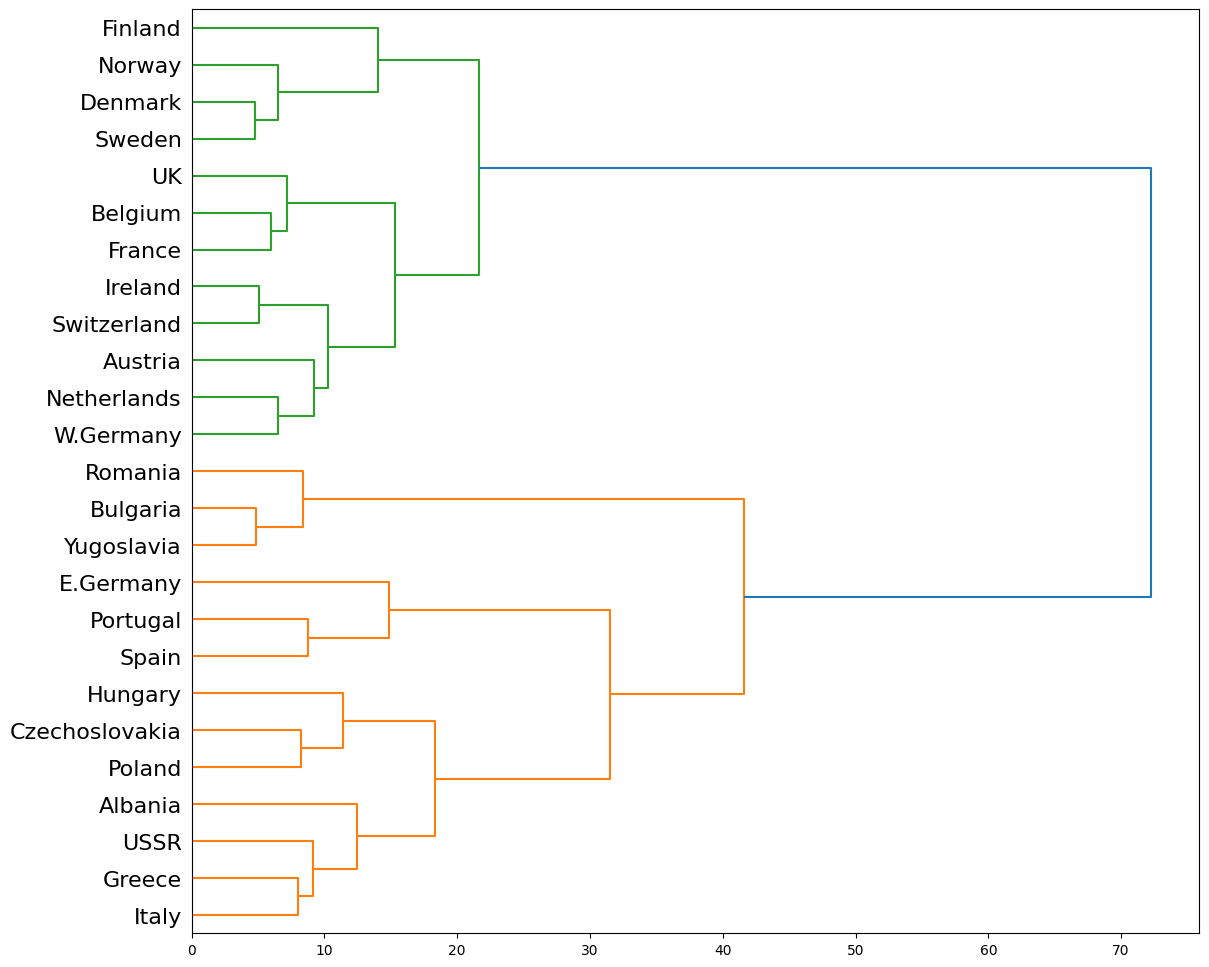

In [21]:
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
);

In [22]:
df['Clusters'] = fcluster(Z2, 2, criterion='maxclust')

df.sample(5)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg,Clusters
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,1
22,USSR,9.3,4.6,2.1,16.6,3.0,43.6,6.4,3.4,2.9,2
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,1
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,2
